<a href="https://colab.research.google.com/github/Kenza-R/HW2Q3.4/blob/main/mgt802_fall_2025_mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGT802 Fall 2025 MNIST digit classification

This is basically the "hello world" of neural networks.

Here we're recreating the neural network from the 3Blue1Brown videos ([website](https://www.3blue1brown.com/lessons/neural-networks), [YouTube videos](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)). We're using [PyTorch](https://pytorch.org/), a popular open source framework for writing your own neural networks.

I hope you have fun with this! You should make your own copy of this notebook and then muck around with it. Here are some things for you to ponder:

1. Kyle likely walked you through this code and trained the network. Can you run it on your own? Use the "play" buttons at the side of each cell or go to "Runtime > Run all" in the menu above.
1. Can you change the activation function from [sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) to [Relu](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)? What is the effect on the training of the network?
2. Can you change the shape of the network? Here we used two 16-node hidden layers ("full connected" or "linear" layers). You could try adding more nodes to the hidden layers...or maybe take some away! What is the effect on your network's performance?
3. Can you add or subtract a hidden layer? What is the effect on the network's performance? (If you add a layer, don't forget to make sure you have an activation function between each layer.)
4. We used the class [stoichastic gradient decent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) optimizer, below. But, that's kinda old school. Can you change your code to use the [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) optimizer. How does this affect convergence? Do you require fewer epochs of training?




## Importing libraries

In [ ]:
# PyTorch is going to do most of our heavy lifting. It's a popular choice
# for writing your own neural networks.
import torch
import torch.nn as nn
import torch.optim as optim

# We use torchvision to load the MNIST data. It's just convenient.
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

# We use numpy for some easy matrix transformations
import numpy as np

# We use matplotlib and seaborn to make some nice plots
import matplotlib.pyplot as plt
import seaborn as sns

# Import some helpers from the popular Scikit-learn library. We will
# use these when we test the performance of the network.
from sklearn.metrics import confusion_matrix, classification_report

## Loading data

In [ ]:
%%capture
# The "%%capture" above suppresses progress bars while it downloads your data.
# That's just so your Colab notebook doesn't get all funky looking.

# Load MNIST dataset, training data only.
trainset = MNIST(root='./data', train=True, download=True, transform=ToTensor())
trainloader = list(DataLoader(trainset, batch_size=32, shuffle=True))

# Load the test set, just like we loaded the training set above
testset = MNIST(root='./data', train=False, download=True, transform=ToTensor())
testloader = list(DataLoader(testset, batch_size=32))

(Above I called `list` on the `DataLoader` objects just so the images are cached and we're load loading them again and again from the hard drive later
on when we do training and testing of our neural network.)

Now let's make a little function to visualize our data conveniently.

In [ ]:
def imshow(image_and_label):
    (image, label) = image_and_label

    # Convert tensor to numpy array
    npimg = image.numpy()

    # Display the image
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.title('Label: ' + str(label))
    plt.show()

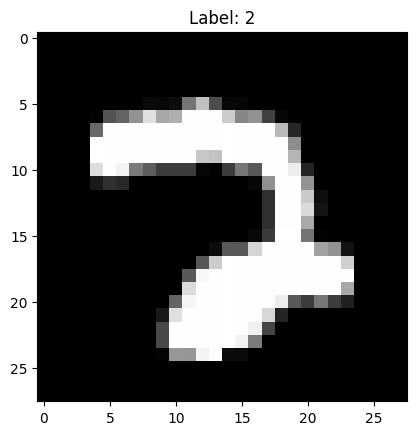

In [ ]:
# Show the 121st image in the training set
imshow(trainset[120])

## Defining our network

Here we define a new class, which inherits from PyTorch's `nn.Module` base
class. If you haven't seen object-oriented programming before you can think of this like `class Human(Mammal)`: we're saying that a human is a kind of mammal. Then, inside our class definition here we're defining what
makes our network unique like we might say what distinguishes humans from other mammals.

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        # Call the init function of our parent class.
        super(SimpleNN, self).__init__()

        # Give this network the ability to flatten
        # incoming image, turning them from squares
        # into 1-d vectors (rank-1 tensors).
        self.flatten = nn.Flatten()

        # Now the fun stuff! Here's the network from
        # the 3Blue1Brown videos.
        num_pixels = 28 * 28
        self.linear_stack = nn.Sequential(
            nn.Linear(num_pixels, 16),
            nn.Sigmoid(),
            nn.Linear(16, 16),
            nn.Sigmoid(),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

In [ ]:
# Initialize the model
model = SimpleNN()

# I think the 3Blue1Brown video showed RMSE, which is weird!
# We're going to use cross entropy loss.
loss_fn = nn.CrossEntropyLoss()

# Set the learning rate. This is a bit of an art.
learning_rate = 0.01

# Create our optimizer. This is going to know how much to change
# our model's parameters based on the gradients we get from
# backpropagation.
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model for 15 epochs. Too few and we will under
# train. Too many and we will over fit! Why 15? ¯\_(ツ)_/¯
epochs = 15
loss_history = []
for epoch in range(epochs):
    for images, labels in trainloader:
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Do backpropogation, calculating
        # gradients through the network
        loss.backward()

        # Let the optimizer make small improvements
        # to our model parameters based on those gradients
        optimizer.step()

        # Reset the gradients for next iteration
        optimizer.zero_grad()


    # Save loss for plotting
    loss_history.append(loss.item())
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 2.285681962966919
Epoch 1, Loss: 2.266464948654175
Epoch 2, Loss: 2.2025704383850098
Epoch 3, Loss: 2.002925157546997
Epoch 4, Loss: 1.7066608667373657
Epoch 5, Loss: 1.5107558965682983
Epoch 6, Loss: 1.3751953840255737
Epoch 7, Loss: 1.2306572198867798
Epoch 8, Loss: 1.074762225151062
Epoch 9, Loss: 0.9446961283683777
Epoch 10, Loss: 0.8564848899841309
Epoch 11, Loss: 0.7959941625595093
Epoch 12, Loss: 0.7498258352279663
Epoch 13, Loss: 0.7113068699836731
Epoch 14, Loss: 0.6778205037117004


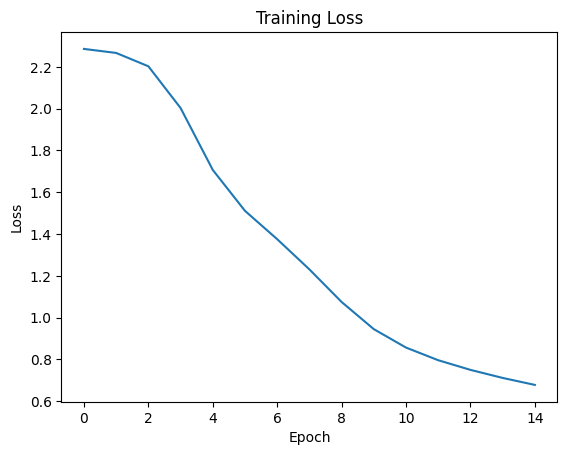

In [ ]:
# Plot the loss
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Test the model

Now we have a trained model! Let's test it on some out-of-sample data.

In [ ]:
# Set the model to evaluation mode (not training mode)
model.eval()

# Lists to store true and predicted labels
true_labels = []
pred_labels = []

# Get the predicted labels for each image. Here, "no_grad"
# disables gradient calcuation, which is what we want when
# testing rather than training.
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels)
        pred_labels.extend(predicted)

print("\nClassification Report:\n\n", classification_report(true_labels, pred_labels))


Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.97      0.94       980
           1       0.93      0.98      0.95      1135
           2       0.89      0.85      0.87      1032
           3       0.80      0.80      0.80      1010
           4       0.79      0.88      0.83       982
           5       0.77      0.78      0.77       892
           6       0.90      0.91      0.91       958
           7       0.89      0.87      0.88      1028
           8       0.79      0.69      0.74       974
           9       0.80      0.73      0.77      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Our model still makes mistakes ☹️. Let's see if those mistakes are reasonble by plotting the [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

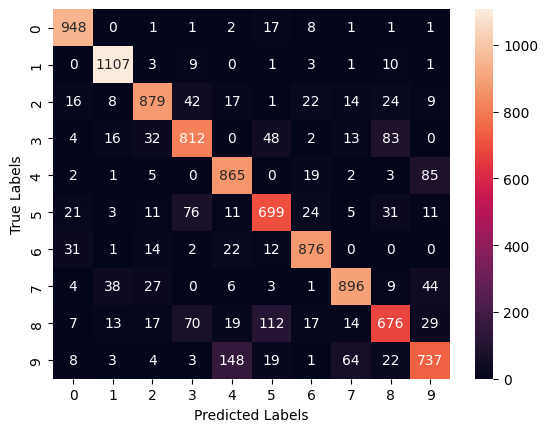

In [ ]:
sns.heatmap(confusion_matrix(true_labels, pred_labels), annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

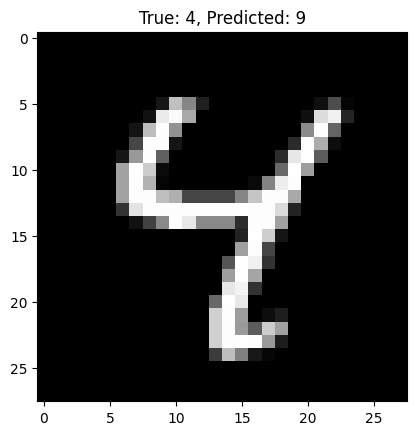

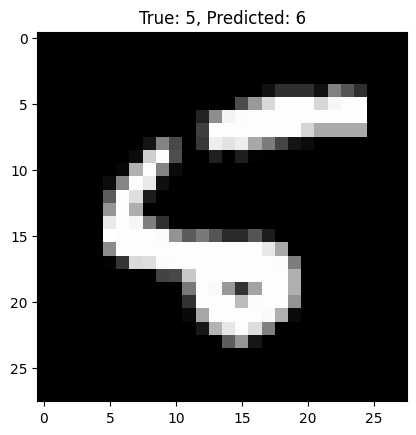

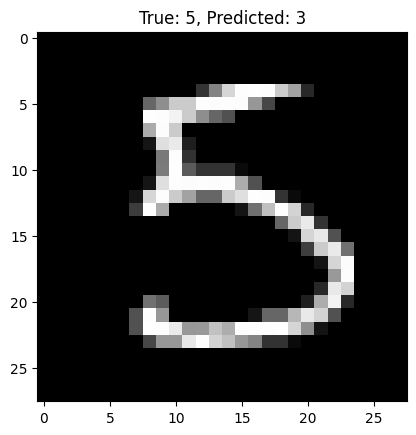

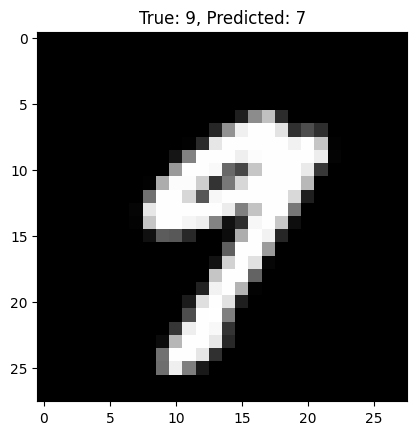

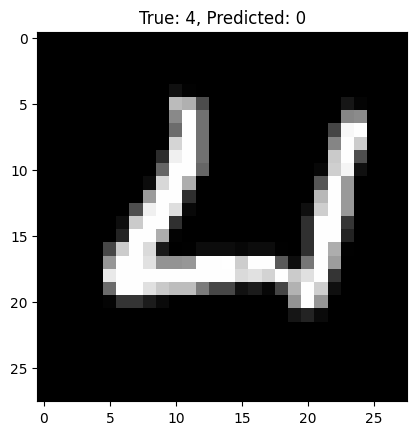

In [ ]:
# prompt: From those that are incorrectly classified, show me a few images.

incorrect_indices = [i for i, (true, pred) in enumerate(zip(true_labels, pred_labels)) if true != pred]

# Show a few incorrectly classified images
num_images_to_show = 5
for i in incorrect_indices[:num_images_to_show]:
  image, label = testset[i]
  predicted_label = pred_labels[i]

  plt.imshow(np.transpose(image.numpy(), (1, 2, 0)), cmap='gray')
  plt.title(f"True: {label}, Predicted: {predicted_label}")
  plt.show()